> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset of Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## load packages and data

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df=pd.read_csv('tmdb-movies.csv');

Three questions proposed are below
1. Which year has the highest release of movies?
2. Which length movies most liked by the audiences according to their popularity?
3. What Profit Rate changes from year to year?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [101]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [103]:
df.shape

(10866, 21)

In [104]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [105]:
# look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [106]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 



#### deal with missing data

In [107]:
# drop unnessary columns and columns with missing data
df.drop(['homepage', 'cast','director','production_companies','release_date','genres','vote_average','imdb_id','tagline','keywords','overview','vote_count','original_title','budget','revenue'],axis=1, inplace=True)

In [108]:
df.head()

,id,popularity,runtime,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,2015,1.747999e+08,1.385749e+09


In [109]:
# drop rows with missing data
df.dropna(inplace=True)

In [110]:
df.shape

(10866, 6)

In [111]:
df.isnull().any()

id              False
popularity      False
runtime         False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

#### dedupe

In [112]:
df.duplicated().sum()

1

In [113]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [114]:
df.duplicated().sum()

0

#### deal with abnormal data

In [115]:
df.head()

,id,popularity,runtime,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,2015,1.747999e+08,1.385749e+09


In [116]:
# drop rows with abnormal data
columns=['runtime','revenue_adj','budget_adj']
for item in columns:
    df.drop(df[df[item]==0].index,inplace=True)

In [117]:
df.shape

(3854, 6)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Which year has the highest release of movies?

In [118]:
df.head(1)

,id,popularity,runtime,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,2015,1.379999e+08,1.392446e+09


Text(0.5, 1.0, 'numbers of movies released in different years')

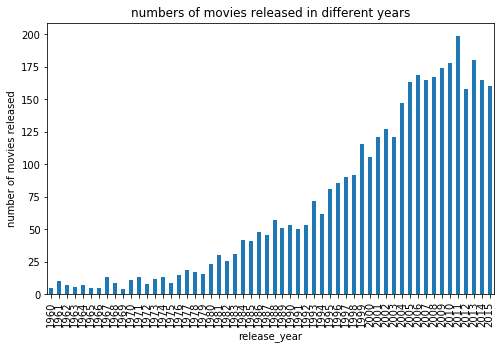

In [119]:
# plot a figure which shows the numbers of movies released every year
df.groupby('release_year')['id'].count().plot(kind='bar',figsize=(8,5))
plt.ylabel('number of movies released')
plt.title('numbers of movies released in different years')

Even though there exist ups and downs in the number of movies release, overall the numbers of movies released is rising along with the time.

Compared with other years, the year of 2011 has the most movies released.

### Which length movies most liked by the audiences according to their popularity?

In [120]:
df.head(1)

,id,popularity,runtime,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,2015,1.379999e+08,1.392446e+09


In [121]:
df.runtime.describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [137]:
import seaborn as sns

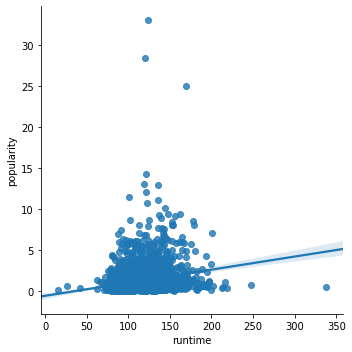

In [138]:
sns.lmplot(x='runtime',y='popularity',data=df)

Apparently, runtime has no correlation with popularity.

There are several outliers, indicating extreme cases existing.

In [122]:
# cut movies' runtimes into different categories
bin_edges=[3.000000 ,91.000000 ,100.000000 ,112.000000 ,877.000000 ]
bin_names=['short','medium_short','medium','long']
df['lenth_level'] = pd.cut(df['runtime'],bin_edges,labels=bin_names)

Text(0.5, 1.0, 'the popularities of different runtime levels')

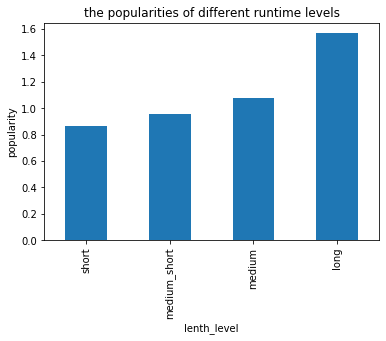

In [123]:
# plot a figure shows the popularities of different runtime levels
df.groupby('lenth_level').popularity.mean().plot(kind='bar')
plt.ylabel('popularity')
plt.title('the popularities of different runtime levels')

Generally, the longer a movie is, more popalarity it has.

Short, medium_short, medium level of runtimes of movies have almost the same popularity, indicating long runtime has significant advantages on inviting popularity.

### What Profit Rate changes from year to year?

In [124]:
# create a column showing the profit rate
df['profit']=df['revenue_adj']-df['budget_adj']

Text(0.5, 1.0, 'profit rate of each year')

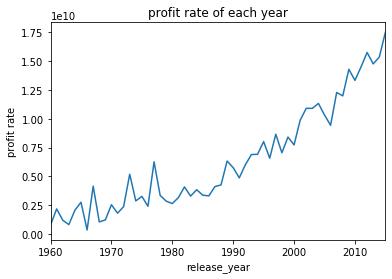

In [125]:
# plot a figure of each year's profit
df.groupby('release_year').profit.sum().plot(kind='line')
plt.ylabel('profit rate')
plt.title('profit rate of each year')

Overall the trend is rising along with the time, even though there are some ups and downs in different years.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Which year has the highest release of movies?

> We can tell from the corresponding figure above, the year of 2014 has the highest release of movies.

###  Which length movies most liked by the audiences according to their popularity?

> Long runtime (between 112 and 877) is most liked by audience.

### What Profit Rate changes from year to year?

> Even though there exist several ups and downs in small ranges, the profit rate has been going up overall.

#### Limitations

Columns including budget_adj and revenue_adj have many zero values. Removing these rows does make an imapct on the results. 

Moreover, the units of budget_adj and revenue_adj are not clear. If unit could be pointed out clearly, the results will be more accurate